# Loading Data

In [5]:
data <- read.csv("D:/Research/keyword/Keyword/All/4 journals.csv")
nrow(data)


[1] 2887

In [6]:
sum(data$cited.by_scaled >0)
sum(data$cited.by_scaled ==0)
sum(data$cited.by_scaled <0)

[1] 890

[1] 0

[1] 1997

# Data Cleaning

In [7]:
nrow(data)
summary(data$cited.by_scaled)

data <- data[data$cited.by_scaled <4,]
nrow(data)
summary(data$cited.by_scaled)

[1] 2887

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6692 -0.5707 -0.3008  0.0000  0.1436 11.7000 

[1] 2850

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.66920 -0.57070 -0.30080 -0.07369  0.11890  3.96100 

# Transforming Variables

In [8]:
na_index <- which(is.na(data$cited.by))
#na_index
data[na_index, "cited.by"] <- 0

data$cited.by.positive.scaled <- 0

for (row in 1:nrow(data))
    {if (data[row,"cited.by_scaled"]   > 0 ) data[row,"cited.by.positive.scaled"] <- 1 }
     
data$cited.by.positive.scaled <- as.factor(data$cited.by.positive.scaled)
summary(data$cited.by.positive.scaled)

0    1 
1997  853

In [4]:
# str(data)

In [5]:
# cited.by.table <- table(data$cited.by)
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# ##------------------------------------
# cited.by.table <- table(log(data$cited.by_zero))
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# Creating New Target Variables

In [11]:
# data$cited.by_zero <- 0


# for (row in 1:nrow(data))
#     {if (data[row,"cited.by"] == 0 ) data[row,"cited.by_zero"] <- data[row,"cited.by"] + 0.5
#     else data[row,"cited.by_zero"] <- data[row,"cited.by"] }
     
# #hist(log(data$cited.by_zero))
    
     
# hist   (log(data$cited.by_zero))
# #barplot(log(data$cited.by_zero))


# Part 2: Predicting leass than mean(0) and more than mean(1)

In [9]:
pred_numeric <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors","weight_ratio"
,"numkeys","article_age")
pred_cat     <- c("source.title","cited.by.positive.scaled")

pred_data  <- data[,c(pred_numeric,pred_cat)]

logistic   <- glm(cited.by.positive.scaled ~ .,family=binomial(link='logit'), data=pred_data)
summary(logistic)


Call:
glm(formula = cited.by.positive.scaled ~ ., family = binomial(link = "logit"), 
    data = pred_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2605  -0.8044  -0.5670   1.0681   2.2751  

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                -2.7647964  0.3148776  -8.781
abstract_length                             0.0017336  0.0008437   2.055
page.count                                 -0.0401413  0.0125167  -3.207
title_length                               -0.0051165  0.0109743  -0.466
abstract_ratio                              3.6988993  2.0224190   1.829
no_references                               0.0176775  0.0022846   7.738
no_authors                                  0.0552256  0.0306998   1.799
weight_ratio                                0.2413374  1.2893723   0.187
numkeys                                    -0.0703993  0.0364695  -1.930
article_age                     

# Model Selection

In [14]:
logistic_step <- step(logistic)
logistic_step

Start:  AIC=3164.71
cited.by.positive.scaled ~ abstract_length + page.count + title_length + 
    abstract_ratio + no_references + no_authors + weight_ratio + 
    numkeys + article_age + source.title

                  Df Deviance    AIC
- title_length     1   3138.7 3162.7
- weight_ratio     1   3139.0 3163.0
- no_authors       1   3140.6 3164.6
<none>                 3138.7 3164.7
- numkeys          1   3141.3 3165.3
- abstract_length  1   3142.1 3166.1
- abstract_ratio   1   3142.2 3166.2
- page.count       1   3145.6 3169.6
- source.title     3   3179.8 3199.8
- no_references    1   3187.9 3211.9
- article_age      1   3512.8 3536.8

Step:  AIC=3162.71
cited.by.positive.scaled ~ abstract_length + page.count + abstract_ratio + 
    no_references + no_authors + weight_ratio + numkeys + article_age + 
    source.title

                  Df Deviance    AIC
- weight_ratio     1   3139.0 3161.0
- no_authors       1   3140.6 3162.6
<none>                 3138.7 3162.7
- numkeys          


Call:  glm(formula = cited.by.positive.scaled ~ abstract_length + page.count + 
    abstract_ratio + no_references + numkeys + article_age + 
    source.title, family = binomial(link = "logit"), data = pred_data)

Coefficients:
                               (Intercept)  
                                  -2.67068  
                           abstract_length  
                                   0.00156  
                                page.count  
                                  -0.03015  
                            abstract_ratio  
                                   3.23467  
                             no_references  
                                   0.01584  
                                   numkeys  
                                  -0.05346  
                               article_age  
                                   0.31001  
       source.titlecomputers and education  
                                  -0.57166  
source.titlecomputers in education journal  
      

In [15]:
logistic_final <- glm(formula = cited.by.positive.scaled ~ abstract_length + page.count + 
    abstract_ratio + no_references + numkeys + article_age + 
    source.title, family = binomial(link = "logit"), data = pred_data)

summary(logistic_final)


Call:
glm(formula = cited.by.positive.scaled ~ abstract_length + page.count + 
    abstract_ratio + no_references + numkeys + article_age + 
    source.title, family = binomial(link = "logit"), data = pred_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2045  -0.8184  -0.5787   1.1057   2.1634  

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                -2.6706795  0.2737532  -9.756
abstract_length                             0.0015598  0.0008215   1.899
page.count                                 -0.0301525  0.0120726  -2.498
abstract_ratio                              3.2346672  1.7732560   1.824
no_references                               0.0158401  0.0022419   7.066
numkeys                                    -0.0534610  0.0352991  -1.515
article_age                                 0.3100062  0.0177388  17.476
source.titlecomputers and education        -0.5716577  0.1276235  -4.479
s

In [8]:
require(car,quietly=TRUE)
qqPlot(logistic, main="QQ Plot") #qq plot for studentized resid 
# qqPlot(linear_reg0, main="QQ Plot") #qq plot for studentized resid 


ERROR: Error in qqPlot.glm(logistic, main = "QQ Plot"): QQ plot for studentized residuals not available for glm


# Outlier Detection

 NULL


     rstudent unadjusted p-value Bonferonni p
921 -4.591244         4.5951e-06     0.013289
922 -4.500166         7.0594e-06     0.020416
923 -4.430990         9.7305e-06     0.028141

,X,no_authors,article_age,page.count,no_references,abstract_length,title_length,abstract_ratio,numkeys,source.title,weight_ratio,cited.by_scaled,cited.by,cited.by.positive.scaled,cited.by.positive.sclaed
921,921,2,15,18,45,130,18,0.1153846,5,computers and education,0.0004686036,-0.6681385,0,0,NA
922,922,4,15,18,40,156,16,0.02564103,4,computers and education,0.0009372071,-0.6681385,0,0,NA
923,923,2,15,11,7,162,16,0.03703704,4,computers and education,0.0004686036,-0.6681385,0,0,NA


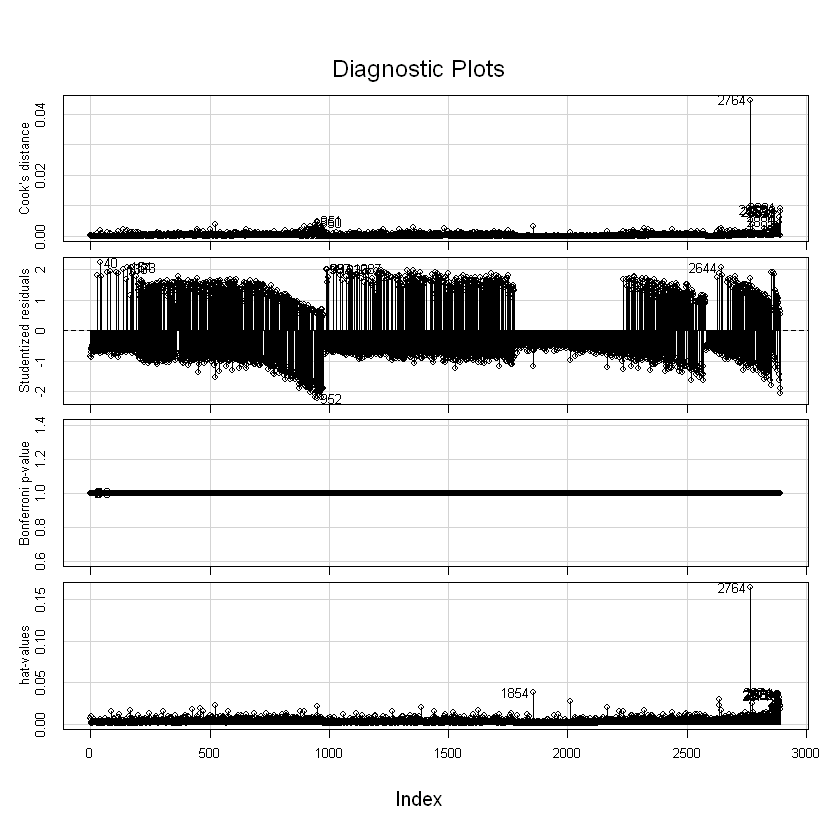

In [18]:
require(car,quietly=TRUE)
influenceIndexPlot <- influenceIndexPlot(logistic, id.n=10)
str(influenceIndexPlot)
outlierTest(linear_reg)
data[c(921,922,923),]

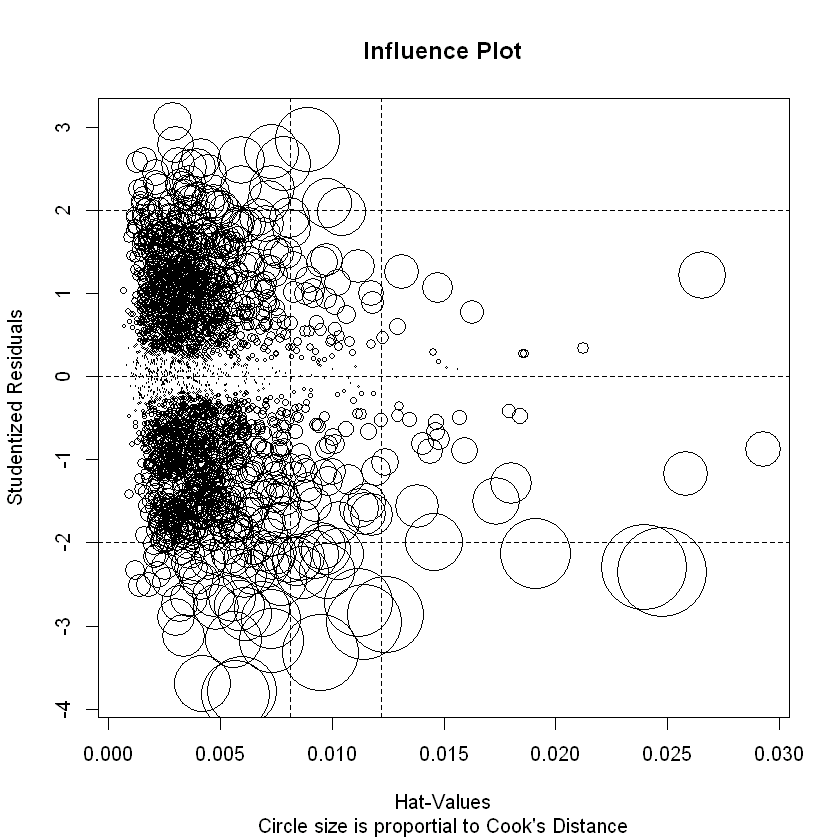

In [41]:
# Influence Plot 
influencePlot(linear_reg,	id.method="identify", main="Influence Plot", 
              sub="Circle size is proportial to Cook's Distance",id.n=10 )

# Box-Cox Transformation

In [8]:
require(MASS, quietly=TRUE)
require(car, quietly=TRUE)

boxCox <- boxCox(logistic, lambda = seq(-0.1, 0.1, by=0.1))
summary(powerTransform(logistic))


ERROR: Error in bc1(out, lambda): First argument must be strictly positive.


Warning message:
In model.response(mf, "numeric"): using type = "numeric" with a factor response will be ignored

ERROR: Error in bc1(out[, j], lambda[j]): First argument must be strictly positive.


# Multi-Collinearity

In [8]:
require(car,quietly=TRUE)
# Evaluate Collinearity

vif(logistic) # variance inflation factors 
# ??vif
sqrt(vif(logistic)) > 2 # problem?
##---------------------------------------------


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,1.146662,1.000000,1.070823
page.count,1.257216,1.000000,1.121257
title_length,1.056602,1.000000,1.027912
abstract_ratio,1.470569,1.000000,1.212670
no_references,1.413395,1.000000,1.188863
no_authors,1.141774,1.000000,1.068538
weight_ratio,1.334634,1.000000,1.155264
numkeys,1.249075,1.000000,1.117620
article_age,1.446135,1.000000,1.202554
source.title,2.265103,3.000000,1.145991


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,FALSE,FALSE,FALSE
page.count,FALSE,FALSE,FALSE
title_length,FALSE,FALSE,FALSE
abstract_ratio,FALSE,FALSE,FALSE
no_references,FALSE,FALSE,FALSE
no_authors,FALSE,FALSE,FALSE
weight_ratio,FALSE,FALSE,FALSE
numkeys,FALSE,FALSE,FALSE
article_age,FALSE,FALSE,FALSE
source.title,FALSE,FALSE,FALSE


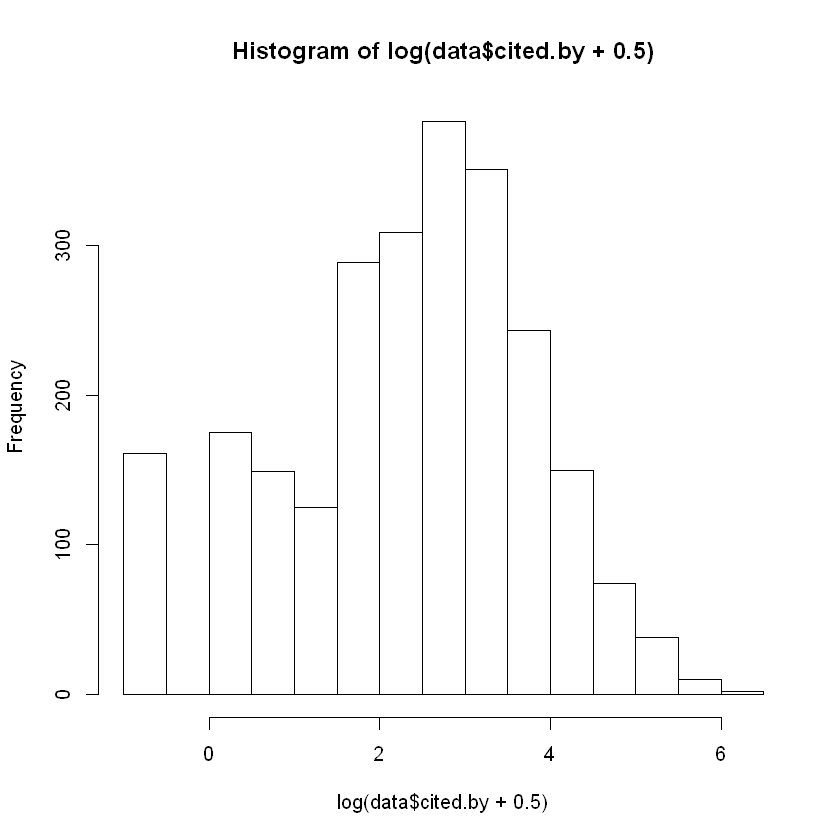

In [5]:
hist(log(data$cited.by+0.5))

In [9]:
save.image()